In [1]:
import sys
import numpy
import matplotlib.pyplot as plt, pandas as pd, matplotlib as mpl, random
from scipy.ndimage import label


def utkarshGrid(): plt.minorticks_on() ; plt.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; plt.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
def utkarshGridAX(ax): ax.minorticks_on() ; ax.grid(color='grey',which='minor',linestyle=":",linewidth='0.1',) ; ax.grid(color='black',which='major',linestyle=":",linewidth='0.1',); return None
mpl.rcParams['legend.frameon'], mpl.rcParams['figure.autolayout'] = False, True,
colour = ["dodgerblue", "goldenrod", "crimson", "teal", "yellowgreen", "grey"]
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ["Palatino"],})
def utkarshWrapper(): plt.legend();plt.utkarshGrid() ;plt.gca().tick_params(direction='in', which='both', right=True, top=True); plt.tight_layout(); return None
def utkarshWrapperAX(ax): utkarshGridAX(ax); ax.tick_params(direction='in', which='both', right=True, top=True); return None;
plt.utkarshGrid = utkarshGrid; plt.utkarshWrapper = utkarshWrapper
def colour_sample(n = 2, col = colour, seed = 7236): random.seed(seed) ; return random.sample(colour, n)
plt.rcParams["image.cmap"] = "Set2" # I recommend, Set2, Dark2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colour) # Use your own OR plt.cm.Set2.colors

In [2]:
import os
import glob
import re
import pandas as pd

# Define pattern to match values from lines
# prob_pattern = r"Probability: P\(mass <= max_mass\(spin, eos\)\) = ([\d\.eE+-]+) \+/- ([\d\.eE+-]+)"
# odds_pattern = r"Odds Ratio\s*:.*= ([\d\.eE+-]+) \+/- ([\d\.eE+-]+)"
prob_pattern = r"Probability: P\(.*?\) = ([0-9.eE+-]+) \+/- ([0-9.eE+-]+)"
odds_pattern = r"Odds Ratio\s*:.*?= ([0-9.eE+-]+) \+/- ([0-9.eE+-]+)"


# Create list to hold parsed data
data = []

# Loop through all .out files
for filepath in glob.glob("*.out"):
    with open(filepath, "r") as f:
        content = f.read()
        prob_match = re.search(prob_pattern, content)
        odds_match = re.search(odds_pattern, content)

        if prob_match and odds_match:
            prob, prob_err = map(float, prob_match.groups())
            odds, odds_err = map(float, odds_match.groups())
            data.append({
                "filename": filepath,
                "probability": prob,
                "prob_error": prob_err,
                "odds_ratio": odds,
                "odds_error": odds_err
            })
        else:
            print(f"Warning: Could not parse values from {filepath}")

# Convert to pandas DataFrame
df = pd.DataFrame(data)


In [3]:
df

,filename,probability,prob_error,odds_ratio,odds_error
0,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+pdb...,0.856607,0.005176,5.973837,0.251720
1,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+pdb...,0.896298,0.004242,8.643024,0.394435
2,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.002267,0.000545,0.002272,0.000547
3,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.128836,0.029123,0.147890,0.038374
4,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.005848,0.001381,0.005883,0.001398
5,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+pdb...,0.819943,0.006133,4.553800,0.189176
6,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.010493,0.002738,0.010604,0.002797
7,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.001060,0.000253,0.001061,0.000254
8,GW190425_C01:IMRPhenomPv2_NRTidal:HighSpin+pdb...,0.716478,0.008609,2.527057,0.107093
9,GW190814_C01:IMRPhenomXPHM+pdbNG_betaSplit3_br...,0.090519,0.005310,0.099528,0.006419


In [8]:
pop_parameter = "beta_1" 
num = r"[+-]?(?:\d+(?:\.\d*)?|\.\d+)(?:[eE][+-]?\d+)?"
pattern = rf"{re.escape(pop_parameter)}\+({num})"
df[pop_parameter] = df["filename"].str.extract(pattern, expand=False).astype(float)
df["event"] = df["filename"].str.extract(r"^(GW\d+)")
df["component"] = df["filename"].str.extract(r"component(\d+)").astype(int)

In [9]:
GW190917_m1 = df[(df['event'] == "GW190917") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190917_m2 = df[(df['event'] == "GW190917") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW230529_m1 = df[(df['event'] == "GW230529") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190814_m2 = df[(df['event'] == "GW190814") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190425_m1 = df[(df['event'] == "GW190425") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW190425_m2 = df[(df['event'] == "GW190425") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200105_m1 = df[(df['event'] == "GW200105") & (df['component'] == 1)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200105_m2 = df[(df['event'] == "GW200105") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)
GW200115_m2 = df[(df['event'] == "GW200115") & (df['component'] == 2)].sort_values(by=pop_parameter).reset_index(drop=True)

In [10]:
GW230529_m1

,filename,probability,prob_error,odds_ratio,odds_error,beta_1,event,component
0,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.000459,0.000107,0.000460,0.000107,-5.0,GW230529,1
1,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.001060,0.000253,0.001061,0.000254,-4.0,GW230529,1
2,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.002267,0.000545,0.002272,0.000547,-3.0,GW230529,1
3,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.005848,0.001381,0.005883,0.001398,-2.0,GW230529,1
4,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.010493,0.002738,0.010604,0.002797,-1.0,GW230529,1
5,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.018460,0.004639,0.018807,0.004815,0.0,GW230529,1
6,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.035866,0.009222,0.037200,0.009921,1.0,GW230529,1
7,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.054779,0.013437,0.057953,0.015039,2.0,GW230529,1
8,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.066960,0.016094,0.071766,0.018487,3.0,GW230529,1
9,GW230529_Combined_PHM_highSpin+pdbNG_betaSplit...,0.106987,0.024195,0.119804,0.030339,4.0,GW230529,1


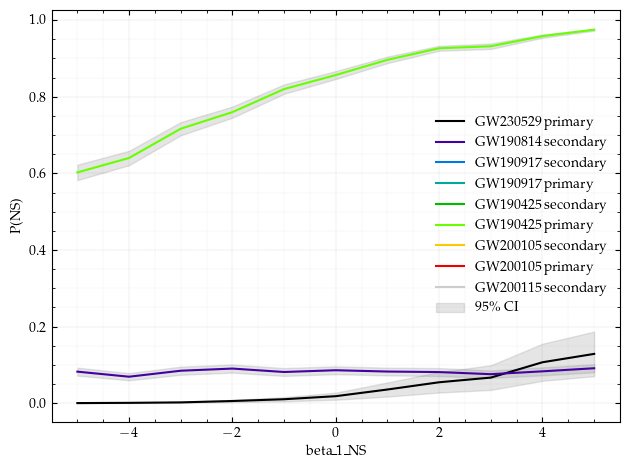

In [11]:
plt.figure()
objects_lst = [GW230529_m1, GW190814_m2, GW190917_m2, GW190917_m1, GW190425_m2, GW190425_m1, GW200105_m2, GW200105_m1, GW200115_m2]
objects_names = ["GW230529 primary", "GW190814 secondary", "GW190917 secondary", "GW190917 primary", "GW190425 secondary", "GW190425 primary", "GW200105 secondary", "GW200105 primary", "GW200115 secondary"]
objects_colors = [ plt.get_cmap("nipy_spectral")(i / (len(objects_lst) - 1)) for i in range(len(objects_lst))]

for i in range(len(objects_lst)):
    curr = objects_lst[i]
    curr_name = objects_names[i]
    p05 = curr["probability"] - curr["prob_error"] * 2
    p95 = curr["probability"] + curr["prob_error"] * 2
    if i == len(objects_lst) - 1:
        lab = "95\% CI"
    else:
        lab = None
    plt.plot(curr[pop_parameter], curr["probability"], label=curr_name, color = objects_colors[i])
    plt.fill_between(curr[pop_parameter], p05, p95, color="grey", alpha=0.2, label=lab)

plt.ylabel("P(NS)")
plt.xlabel(f"{pop_parameter}_NS")
plt.utkarshWrapper()
plt.savefig(f"../grid_plots/{pop_parameter}_NS_EOS.png") 
plt.show()